In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize']=(20,10)

In [5]:
df=pd.read_csv('chennai.csv')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df.shape

(5014, 40)

In [12]:
df.corr()['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.443300
No. of Bedrooms        0.313354
Resale                 0.076791
Gymnasium              0.050549
SwimmingPool           0.049768
LandscapedGardens      0.047867
PowerBackup            0.047841
ClubHouse              0.047142
Intercom               0.046761
Children'splayarea     0.046719
24X7Security           0.043746
IndoorGames            0.042308
LiftAvailable          0.042119
RainWaterHarvesting    0.041836
SportsFacility         0.041782
CarParking             0.041258
VaastuCompliant        0.041234
Gasconnection          0.040111
JoggingTrack           0.040089
MultipurposeRoom       0.039828
Sofa                   0.039125
Cafeteria              0.039122
WashingMachine         0.038930
Microwave              0.038655
AC                     0.038634
DiningTable            0.038605
BED                    0.038284
StaffQuarter           0.038284
MaintenanceStaff       0.038247
ShoppingMall           0.038235
Refriger

In [13]:
df2=df[['Price','Area','Location','No. of Bedrooms']]
df2.head()

,Price,Area,Location,No. of Bedrooms
0,5500000,1310,Perungalathur,3
1,5350000,1126,Madhavaram,2
2,8205000,1307,Karapakkam,3
3,23400000,3600,Thiruvidandhai,3
4,10100000,1700,Iyappanthangal,3


In [14]:
df2.isna().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [20]:
df2['bath']=df2['Area'].apply(lambda x:int(x/1000) if x>2000 else 2)
df2.head()

,Price,Area,Location,No. of Bedrooms,bath
0,5500000,1310,Perungalathur,3,2
1,5350000,1126,Madhavaram,2,2
2,8205000,1307,Karapakkam,3,2
3,23400000,3600,Thiruvidandhai,3,3
4,10100000,1700,Iyappanthangal,3,2


In [22]:
df3=df2.rename(columns={'Price':'price','Area':'total_sqft','Location':'location','No. of Bedrooms':'bhk'})
df3.head()

,price,total_sqft,location,bhk,bath
0,5500000,1310,Perungalathur,3,2
1,5350000,1126,Madhavaram,2,2
2,8205000,1307,Karapakkam,3,2
3,23400000,3600,Thiruvidandhai,3,3
4,10100000,1700,Iyappanthangal,3,2


In [23]:
df3['price_per_sqft']=round(df3['price']/df3['total_sqft'],2)
df3.head()

,price,total_sqft,location,bhk,bath,price_per_sqft
0,5500000,1310,Perungalathur,3,2,4198.47
1,5350000,1126,Madhavaram,2,2,4751.33
2,8205000,1307,Karapakkam,3,2,6277.74
3,23400000,3600,Thiruvidandhai,3,3,6500.00
4,10100000,1700,Iyappanthangal,3,2,5941.18


In [40]:
len(df3.location.unique())

185

In [46]:
df3['location']=df3.location.apply(lambda x:x.strip())

location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [47]:
location_stats

location
Medavakkam              230
Ambattur                195
Sholinganallur          177
Karapakkam              161
Iyappanthangal          158
                       ... 
Egattur                   1
Shanthi Nagar             1
Shenoy Nagar              1
Tharapakkam               1
200 Feet Radial Road      1
Name: location, Length: 185, dtype: int64

In [104]:
location_less_than_5=(location_stats[location_stats<=5])

In [105]:
df3['location']=df3.location.apply(lambda x:'other' if x in location_less_than_5 else x)

In [106]:
df3.location.value_counts()

Medavakkam        230
Ambattur          195
Sholinganallur    177
other             169
Karapakkam        161
                 ... 
Anakaputhur         6
Annanagar West      6
Gopalapuram         6
Puzhal              6
Chitlapakkam        6
Name: location, Length: 109, dtype: int64

In [110]:
df3[df3.total_sqft/df3.bhk<300].location.value_counts()

Avadi                   4
Alwarpet                4
Thiruverkadu            3
Perungalathur           3
Pallavaram              3
Pozhichalur             2
Pammal                  2
Kolapakkam              2
other                   1
Thaiyur                 1
Velappanchavadi         1
Padur                   1
Ayapakkam               1
Guduvancheri            1
Kanathur Reddikuppam    1
Name: location, dtype: int64

In [117]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]

In [118]:
df4.head()

,price,total_sqft,location,bhk,bath,price_per_sqft
0,5500000,1310,Perungalathur,3,2,4198.47
1,5350000,1126,Madhavaram,2,2,4751.33
2,8205000,1307,Karapakkam,3,2,6277.74
3,23400000,3600,other,3,3,6500.00
4,10100000,1700,Iyappanthangal,3,2,5941.18


In [119]:
df4.shape

(4984, 6)

In [120]:
df4.price_per_sqft.describe()

count      4984.000000
mean       7107.082394
std        7626.570789
min         384.870000
25%        4264.480000
50%        5382.800000
75%        7022.830000
max      277341.390000
Name: price_per_sqft, dtype: float64

In [121]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(4306, 6)

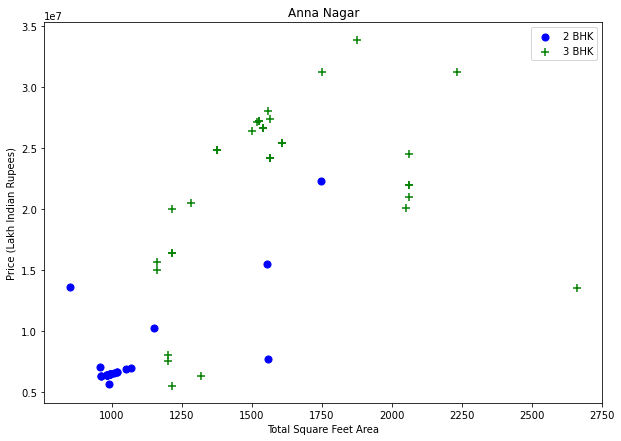

In [198]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Anna Nagar")

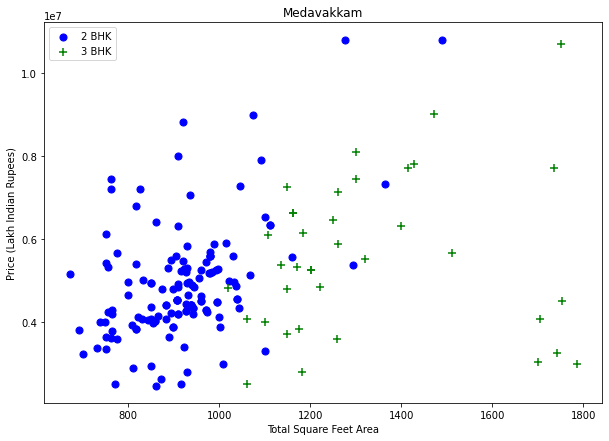

In [209]:
plot_scatter_chart(df5,'Medavakkam')

In [210]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(2852, 6)

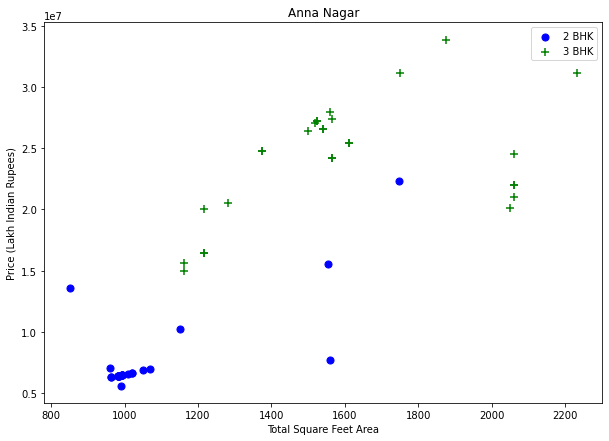

In [211]:
plot_scatter_chart(df6,"Anna Nagar")

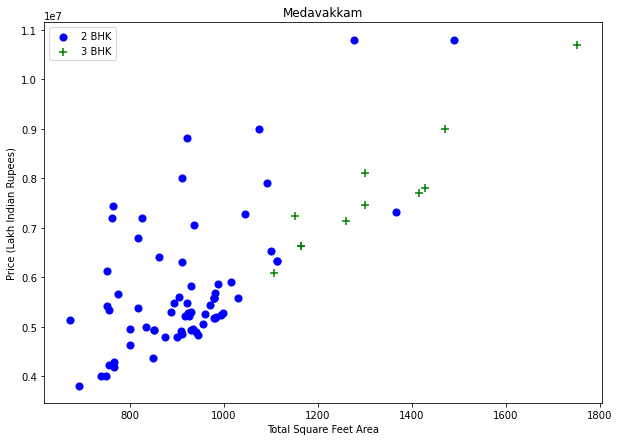

In [212]:
plot_scatter_chart(df6,"Medavakkam")

Text(0, 0.5, 'Count')

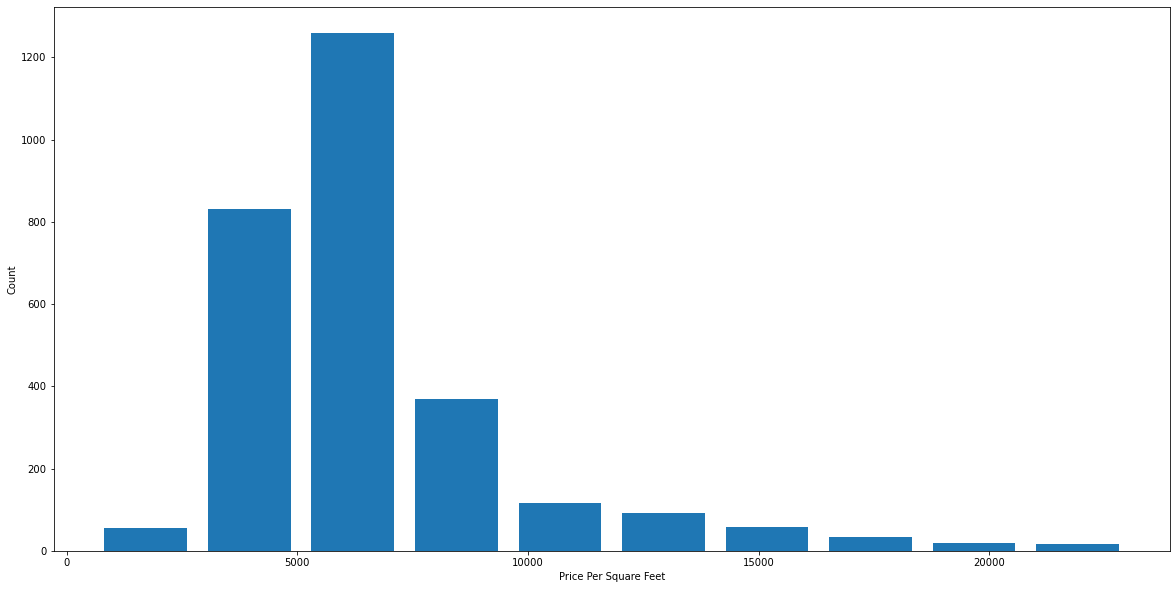

In [214]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [215]:
df7 = df6.drop(['price_per_sqft'],axis='columns')
df7.head(3)

,price,total_sqft,location,bhk,bath
0,2800000,560,Adambakkam,1,2
1,8000000,1000,Adambakkam,2,2
2,10000000,1293,Adambakkam,3,2


In [216]:
df7=df7[['price','total_sqft','location','bath','bhk']]
df7.head()

,price,total_sqft,location,bath,bhk
0,2800000,560,Adambakkam,2,1
1,8000000,1000,Adambakkam,2,2
2,10000000,1293,Adambakkam,2,3
3,10700000,1355,Adambakkam,2,3
4,10700000,1355,Adambakkam,2,3


In [217]:
dummies = pd.get_dummies(df7.location)
dummies.head(3)

,Adambakkam,Adyar,Alwarpet,Ambattur,Anakaputhur,Anna Nagar,Annamalai Colony,Annanagar West,Avadi,Ayanambakkam,...,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,other,tambaram west
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,price,total_sqft,location,bath,bhk,Adambakkam,Adyar,Alwarpet,Ambattur,Anakaputhur,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,2800000,560,Adambakkam,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8000000,1000,Adambakkam,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000000,1293,Adambakkam,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10700000,1355,Adambakkam,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10700000,1355,Adambakkam,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
df9 = df8.drop('location',axis='columns')
df9.head()

,price,total_sqft,bath,bhk,Adambakkam,Adyar,Alwarpet,Ambattur,Anakaputhur,Anna Nagar,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,2800000,560,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8000000,1000,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000000,1293,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10700000,1355,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10700000,1355,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
X= df9.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Adambakkam,Adyar,Alwarpet,Ambattur,Anakaputhur,Anna Nagar,Annamalai Colony,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,560,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1293,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
y=df9.price
y.head(3)

0     2800000
1     8000000
2    10000000
Name: price, dtype: int64

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [249]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6892409354251847

In [250]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75489989, 0.72471004, 0.75011084, 0.81615003, 0.77366721])

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.763908,{'normalize': False}
1,lasso,0.763908,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.721294,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [271]:
l_gs =GridSearchCV(LinearRegression(),{'normalize':[False]}, cv=cv, return_train_score=False)
l_gs.fit(X,y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=LinearRegression(), param_grid={'normalize': [False]})

In [272]:
l_gs.best_score_

0.7639076032447791

In [273]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x= np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return round(l_gs.predict([x])[0]/100000,2)

In [274]:
predict_price('Anna Nagar',1000, 2, 2)

136.78

In [275]:
predict_price('Kolathur',1000,2,2)

58.14

In [276]:
predict_price('Perambur',1000,2,2)

73.37

In [281]:
import pickle
with open('chennai_home_prices_model.pickle','wb') as f:
    pickle.dump(l_gs,f)

In [280]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))